<a href="https://colab.research.google.com/github/klmahalakshmi0102/Data_Analysis/blob/master/Office_Supplies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Sales Analysis:
   - What are the total sales for each product category?
   - Which product category has the highest sales?
   - Identify the top 10 best-selling products.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/P2- OfficeSupplies Data.csv")
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95


In [ ]:
df['total_sales']  = df['Units'] * df['Unit Price']
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,total_sales
0,04-Jul-14,East,Richard,Pen Set,62,4.99,309.38
1,12-Jul-14,East,Nick,Binder,29,1.99,57.71
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,686.95
3,29-Jul-14,East,Susan,Binder,81,19.99,1619.19
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95,1005.90


In [ ]:
total_sales_per_item = df.groupby('Item')['total_sales'].sum()
total_sales_per_item

Item
Binder     9577.65
Desk       1700.00
Pen        2045.22
Pen Set    4169.87
Pencil     2135.14
Name: total_sales, dtype: float64

In [ ]:
# x = max(total_sales_per_item.items(), key=lambda x: x[1])
# print(x)

# # OR

highest_sales = total_sales_per_item.sort_values(ascending=False).index[0]
print(f"Product category with the highest sales: {highest_sales}")


('Binder', 9577.65)
Product category with the highest sales: Binder


In [ ]:
#Identify the top 10 best-selling products.

top_10_products = total_sales_per_item.sort_values(ascending=False).head(10)
print("Top 10 Best-Selling Products:")
print(top_10_products)


Top 10 Best-Selling Products:
Item
Binder     9577.65
Pen Set    4169.87
Pencil     2135.14
Pen        2045.22
Desk       1700.00
Name: total_sales, dtype: float64


# 2.  Customer Analysis:
   - Who are the top 10 customers by sales?
   - What is the total number of unique customers?
   - Analyze customer purchase frequency.


In [ ]:
top_10_customers = df.groupby('Rep')['total_sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Sales:")
top_10_customers

Top 10 Customers by Sales:


Rep
Matthew    3109.44
Susan      3102.30
Alex       2812.19
Richard    2363.04
Bill       1749.87
Smith      1641.43
Morgan     1387.77
James      1283.61
Thomas     1203.11
Nick        536.75
Name: total_sales, dtype: float64

In [ ]:
total_unique_customers = df['Rep'].unique()
print("Total number of unique customers:" ,len(total_unique_customers))

Total number of unique customers: 11


In [ ]:
customer_purchase_frequency = df.groupby('Rep')['OrderDate'].unique()
print("Customer Purchase Frequency:")
customer_purchase_frequency



Customer Purchase Frequency:


Rep
Alex       [17-Nov-14, 04-Dec-14, 09-Feb-15, 24-Mar-15, 0...
Bill       [10-Sep-14, 15-Jan-15, 26-Feb-15, 14-May-15, 3...
James           [24-Aug-14, 27-Sep-14, 07-Mar-15, 15-Mar-15]
Matthew         [07-Aug-14, 25-Nov-14, 23-Jan-15, 17-Jun-15]
Morgan                     [21-Jul-14, 05-Oct-14, 25-Jun-15]
Nick                                  [12-Jul-14, 27-Apr-15]
Rachel          [31-Oct-14, 21-Dec-14, 10-Apr-15, 18-Apr-15]
Richard    [04-Jul-14, 15-Aug-14, 18-Sep-14, 22-Oct-14, 0...
Smith                      [01-Sep-14, 12-Dec-14, 01-Feb-15]
Susan                      [29-Jul-14, 08-Nov-14, 29-Dec-14]
Thomas                                [14-Oct-14, 22-May-15]
Name: OrderDate, dtype: object

In [ ]:
count_purchase_frequency = customer_purchase_frequency.apply(len)
print("Count of Purchase Frequency:")
print(count_purchase_frequency)

Count of Purchase Frequency:
Rep
Alex       5
Bill       5
James      4
Matthew    4
Morgan     3
Nick       2
Rachel     4
Richard    8
Smith      3
Susan      3
Thomas     2
Name: OrderDate, dtype: int64


# 3.  Time Series Analysis:
   - What are the monthly sales trends over the past year?
   - Identify any seasonal patterns in the sales data.


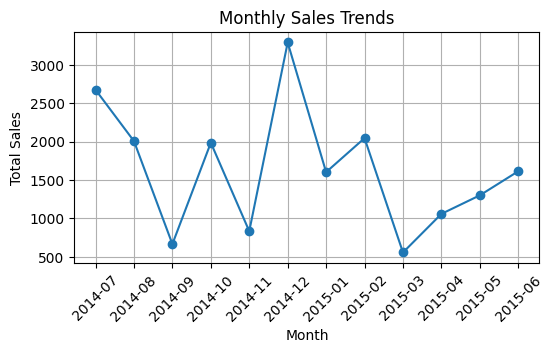

In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format = '%d-%b-%y')
df['YearMonth'] = df['OrderDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['total_sales'].sum().reset_index()
# Plot the monthly sales trends
plt.figure(figsize=(6, 3))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['total_sales'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 4.  Geographical Analysis:
   - Which regions generate the most sales?
   - What are the sales trends across different regions?


In [ ]:
regions_sales = df.groupby('Region')['total_sales'].sum()
print("Sales by Region:")
regions_sales

Sales by Region:


Region
Central    11139.07
East        6002.09
West        2486.72
Name: total_sales, dtype: float64

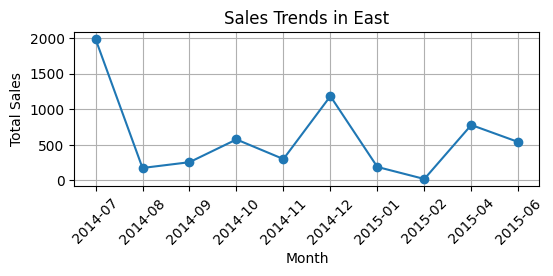

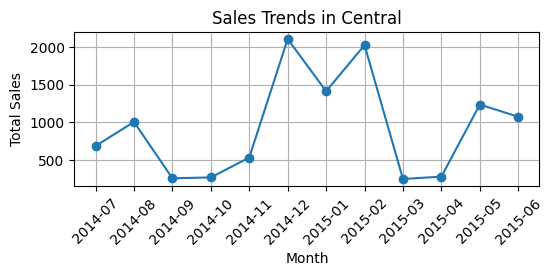

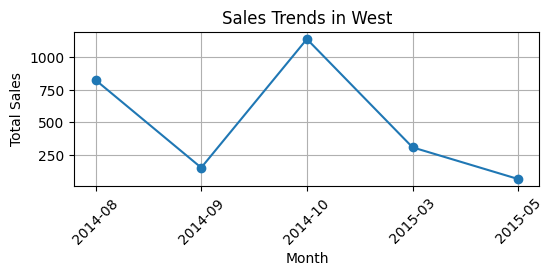

In [ ]:

# Sales trends across different regions
monthly_sales_by_region = df.groupby(['Region', 'YearMonth'])['total_sales'].sum().reset_index()

# Plot the sales trends for each region
import matplotlib.pyplot as plt

for region in df['Region'].unique():
  region_data = monthly_sales_by_region[monthly_sales_by_region['Region'] == region]
  plt.figure(figsize=(6, 2))
  plt.plot(region_data['YearMonth'].astype(str), region_data['total_sales'], marker='o')
  plt.title(f'Sales Trends in {region}')
  plt.xlabel('Month')
  plt.ylabel('Total Sales')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()


# 5.  Profit Analysis:
   - What is the total profit for each product category?
   - Identify the top 10 most profitable products.


In [ ]:
profit_margin = 0.20  # 20% profit margin

In [ ]:
df['profit'] = df['total_sales'] * profit_margin


In [ ]:
total_profit_by_category = df.groupby('Item')['profit'].sum().reset_index()
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,total_sales,YearMonth,profit
0,2014-07-04,East,Richard,Pen Set,62,4.99,309.38,2014-07,61.876
1,2014-07-12,East,Nick,Binder,29,1.99,57.71,2014-07,11.542
2,2014-07-21,Central,Morgan,Pen Set,55,12.49,686.95,2014-07,137.390
3,2014-07-29,East,Susan,Binder,81,19.99,1619.19,2014-07,323.838
4,2014-08-07,Central,Matthew,Pen Set,42,23.95,1005.90,2014-08,201.180


In [ ]:
total_profit_by_item = df.groupby('Item')['profit'].sum().reset_index()
print("Total Profit by Product Item:")
print(total_profit_by_item)


Total Profit by Product Item:
      Item    profit
0   Binder  1915.530
1     Desk   340.000
2      Pen   409.044
3  Pen Set   833.974
4   Pencil   427.028


In [ ]:

top_10_profitable_products = df.groupby('Item')['profit'].sum().reset_index()
top_10_profitable_products.nlargest(10, 'profit')

,Item,profit
0,Binder,1915.530
3,Pen Set,833.974
4,Pencil,427.028
2,Pen,409.044
1,Desk,340.000
